# 1. 문제정의

# 2. 데이터 수집

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [2]:
train = pd.read_csv("train.csv", encoding = "utf-8", index_col = 'ID')

In [3]:
test = pd.read_csv("test.csv", encoding = "utf-8", index_col = 'ID')

In [4]:
train

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,C,Ship,2.0,2,135,3.0,low,M,NaN,1339,1
2,F,Flight,5.0,3,225,5.0,low,F,6.0,1082,0
3,F,Ship,3.0,1,229,3.0,low,M,NaN,4971,1
4,F,Ship,3.0,2,228,NaN,medium,M,2.0,5640,0
5,D,Flight,NaN,1,195,6.0,high,F,NaN,4944,1
...,...,...,...,...,...,...,...,...,...,...,...
6995,D,Ship,4.0,2,232,5.0,medium,F,4.0,1783,0
6996,F,Ship,3.0,5,228,2.0,medium,F,NaN,5208,0
6997,D,Ship,NaN,1,300,5.0,low,F,10.0,1787,0


In [5]:
test

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
ID,,,,,,,,,,
7000,F,Ship,3.0,1,274,NaN,high,M,NaN,4352
7001,F,Ship,3.0,4,136,2.0,medium,F,NaN,1056
7002,A,Flight,NaN,5,140,3.0,low,F,7.0,5383
7003,C,Ship,NaN,1,291,4.0,low,F,NaN,1880
7004,F,?,4.0,2,147,3.0,low,F,5.0,5174
...,...,...,...,...,...,...,...,...,...,...
10995,A,?,4.0,1,204,4.0,?,F,NaN,1667
10996,C,Ship,NaN,3,195,2.0,medium,M,NaN,3869
10997,B,Flight,NaN,3,206,2.0,medium,M,7.0,4531


# 3. 데이터 전처리

In [6]:
train.keys()

Index(['Warehouse_block ', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [7]:
train.keys().unique()

Index(['Warehouse_block ', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

## 3.1 X_train 테이블 Warehouse_block,  Mode_of_Shipment, Product_importance, Gender 컬럼 라벨 인코딩

### 3.1.1 Warehouse_block 컬럼 라벨 인코딩

In [8]:
train['Warehouse_block '].value_counts()

F    2311
C    1184
A    1174
D    1168
B    1162
Name: Warehouse_block , dtype: int64

In [9]:
Warehouse_block_dic = {
    'F' : 1,
    'C' : 2,
    'A' : 3,
    'D' : 4,
    'B' : 5
}

In [10]:
train['Warehouse_block '] = train['Warehouse_block '].map(Warehouse_block_dic)

In [11]:
train['Warehouse_block ']

ID
1       2
2       1
3       1
4       1
5       4
       ..
6995    4
6996    1
6997    4
6998    3
6999    3
Name: Warehouse_block , Length: 6999, dtype: int64

In [12]:
test['Warehouse_block '] = test['Warehouse_block '].map(Warehouse_block_dic)
test['Warehouse_block ']

ID
7000     1
7001     1
7002     3
7003     2
7004     1
        ..
10995    3
10996    2
10997    5
10998    2
10999    4
Name: Warehouse_block , Length: 4000, dtype: int64

### 3.1.2 Mode_of_Shipment 컬럼 라벨 인코딩

In [13]:
train['Mode_of_Shipment'].value_counts()

 Ship        4508
 Road        1075
 Flight      1039
?             373
 Shipzk         2
 Flightzk       1
 Roadzk         1
Name: Mode_of_Shipment, dtype: int64

In [14]:
train['Mode_of_Shipment'].unique()

array([' Ship', ' Flight', ' Road', '?', ' Shipzk', ' Flightzk',
       ' Roadzk'], dtype=object)

In [15]:
Mode_of_Shipment_dic = {
    ' Ship' : 1,
    ' Road' : 2,
    ' Flight' : 3,
    '?' : 4,
    ' Shipzk' : 5,
    ' Flightzk' : 6,
    ' Roadzk' : 7
}

In [16]:
train['Mode_of_Shipment'] = train['Mode_of_Shipment'].map(Mode_of_Shipment_dic)

In [17]:
train['Mode_of_Shipment']

ID
1       1
2       3
3       1
4       1
5       3
       ..
6995    1
6996    1
6997    1
6998    2
6999    1
Name: Mode_of_Shipment, Length: 6999, dtype: int64

In [18]:
test['Mode_of_Shipment'].value_counts()

 Ship      2551
 Flight     631
 Road       595
?           221
 Shipzk       1
 Roadzk       1
Name: Mode_of_Shipment, dtype: int64

In [19]:
test['Mode_of_Shipment'] = test['Mode_of_Shipment'].map(Mode_of_Shipment_dic)
test['Mode_of_Shipment']

ID
7000     1
7001     1
7002     3
7003     1
7004     4
        ..
10995    4
10996    1
10997    3
10998    1
10999    1
Name: Mode_of_Shipment, Length: 4000, dtype: int64

In [20]:
train['Mode_of_Shipment'].unique()

array([1, 3, 2, 4, 5, 6, 7], dtype=int64)

In [21]:
test['Mode_of_Shipment'].unique()

array([1, 3, 4, 2, 5, 7], dtype=int64)

### 3.1.3 Product_importance 컬럼의 라벨 인코딩

In [22]:
train['Product_importance'].unique()

array(['low', 'medium', 'high', '?', 'mediumm', 'loww', 'highh'],
      dtype=object)

In [23]:
train['Product_importance'].value_counts()

low        3344
medium     2982
high        573
?            97
highh         1
loww          1
mediumm       1
Name: Product_importance, dtype: int64

In [24]:
Product_importance_dic = {
    'low' : 1,
    'medium' : 2,
    'high' : 3,
    '?' : 4,
    'loww' : 1,
    'mediumm' : 2,
    'highh' : 3
}

In [25]:
train['Product_importance'] = train['Product_importance'].map(Product_importance_dic)

In [26]:
train['Product_importance']

ID
1       1
2       1
3       1
4       2
5       3
       ..
6995    2
6996    2
6997    1
6998    2
6999    3
Name: Product_importance, Length: 6999, dtype: int64

In [27]:
test['Product_importance'] = test['Product_importance'].map(Product_importance_dic)

In [28]:
test['Product_importance']

ID
7000     3
7001     2
7002     1
7003     1
7004     1
        ..
10995    4
10996    2
10997    2
10998    1
10999    4
Name: Product_importance, Length: 4000, dtype: int64

### 3.1.4 Gender 컬럼 라벨 인코딩

In [29]:
train['Gender'].value_counts()

M    3509
F    3490
Name: Gender, dtype: int64

In [30]:
Gender_dic = {
    'M' : 1,
    'F' : 2
}

In [31]:
train['Gender'] = train['Gender'].map(Gender_dic)

In [32]:
train['Gender']

ID
1       1
2       2
3       1
4       1
5       2
       ..
6995    2
6996    2
6997    2
6998    1
6999    2
Name: Gender, Length: 6999, dtype: int64

In [33]:
test['Gender'] = test['Gender'].map(Gender_dic)

In [34]:
test['Gender']

ID
7000     1
7001     2
7002     2
7003     2
7004     2
        ..
10995    2
10996    1
10997    1
10998    1
10999    1
Name: Gender, Length: 4000, dtype: int64

In [35]:
train

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,2,1,2.0,2,135,3.0,1,1,NaN,1339,1
2,1,3,5.0,3,225,5.0,1,2,6.0,1082,0
3,1,1,3.0,1,229,3.0,1,1,NaN,4971,1
4,1,1,3.0,2,228,NaN,2,1,2.0,5640,0
5,4,3,NaN,1,195,6.0,3,2,NaN,4944,1
...,...,...,...,...,...,...,...,...,...,...,...
6995,4,1,4.0,2,232,5.0,2,2,4.0,1783,0
6996,1,1,3.0,5,228,2.0,2,2,NaN,5208,0
6997,4,1,NaN,1,300,5.0,1,2,10.0,1787,0


In [36]:
train['Weight_in_gms'].value_counts()

?       446
1817      8
1367      8
5208      7
1665      7
       ... 
2684      1
3521      1
1810      1
1584      1
3775      1
Name: Weight_in_gms, Length: 3332, dtype: int64

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      6999 non-null   int64  
 1   Mode_of_Shipment     6999 non-null   int64  
 2   Customer_care_calls  5423 non-null   float64
 3   Customer_rating      6999 non-null   int64  
 4   Cost_of_the_Product  6999 non-null   int64  
 5   Prior_purchases      6049 non-null   float64
 6   Product_importance   6999 non-null   int64  
 7   Gender               6999 non-null   int64  
 8   Discount_offered     3468 non-null   float64
 9   Weight_in_gms        6999 non-null   object 
 10  Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 656.2+ KB


# 4. 탐색적 데이터 분석(EDA)
- 결측치가 있는 컬럼 : Mode_of_Shipment, Product_importance, Customer_care_calls, Prior_purchases, Discount_offered, Weight_in_gms
- 결측치가 없는 컬럼 : Warehouse_block, Customer_rating, Cost_of_the_Product, Gender, Reached.on.Time_Y.N
- 원핫인코딩시 범주화 시켜줘야할 데이터 컬럼 : Cost_of_the_Product, Weight_in_gms 

## 4.1 결측치가 없는 컬럼 분석

### 4.1.1 Customer_rating

In [38]:
train['Customer_rating'].value_counts()

3     1451
2     1399
5     1399
1     1391
4     1357
99       2
Name: Customer_rating, dtype: int64

In [39]:
train['Customer_rating'][(train['Customer_rating']==99)] = 6

<ipython-input-39-88dcb78cd93f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Customer_rating'][(train['Customer_rating']==99)] = 6


In [40]:
train[(train['Customer_rating']==6)]

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
3151,4,1,5.0,6,255,NaN,3,1,NaN,4044,1
6395,2,3,4.0,6,180,3.0,1,2,NaN,1434,1


In [41]:
train['Reached.on.Time_Y.N'].value_counts()

1    4162
0    2837
Name: Reached.on.Time_Y.N, dtype: int64

<AxesSubplot:xlabel='Customer_rating', ylabel='count'>

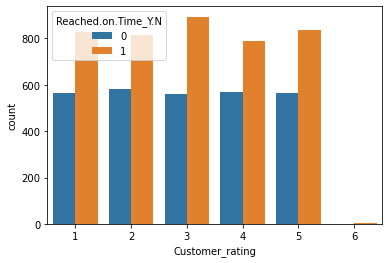

In [42]:
sns.countplot(data = train, 
             x = 'Customer_rating',
             hue = 'Reached.on.Time_Y.N')

In [43]:
test['Customer_rating'].value_counts()

1     843
4     831
3     788
5     772
2     764
99      2
Name: Customer_rating, dtype: int64

In [44]:
test['Customer_rating'][(test['Customer_rating']==99)] = 6

<ipython-input-44-ffdfdd051e9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Customer_rating'][(test['Customer_rating']==99)] = 6


In [45]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 7000 to 10999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      4000 non-null   int64  
 1   Mode_of_Shipment     4000 non-null   int64  
 2   Customer_care_calls  3144 non-null   float64
 3   Customer_rating      4000 non-null   int64  
 4   Cost_of_the_Product  4000 non-null   int64  
 5   Prior_purchases      3633 non-null   float64
 6   Product_importance   4000 non-null   int64  
 7   Gender               4000 non-null   int64  
 8   Discount_offered     2085 non-null   float64
 9   Weight_in_gms        4000 non-null   object 
dtypes: float64(3), int64(6), object(1)
memory usage: 343.8+ KB


### 4.1.2 Warehouse_block

In [46]:
train['Warehouse_block '].value_counts()

1    2311
2    1184
3    1174
4    1168
5    1162
Name: Warehouse_block , dtype: int64

### 4.1.3.1  Cost_of_the_Product

In [47]:
train['Cost_of_the_Product'].value_counts()

254    73
250    68
263    67
243    67
264    66
       ..
96      3
122     2
302     2
119     2
97      1
Name: Cost_of_the_Product, Length: 216, dtype: int64

<AxesSubplot:xlabel='Cost_of_the_Product', ylabel='count'>

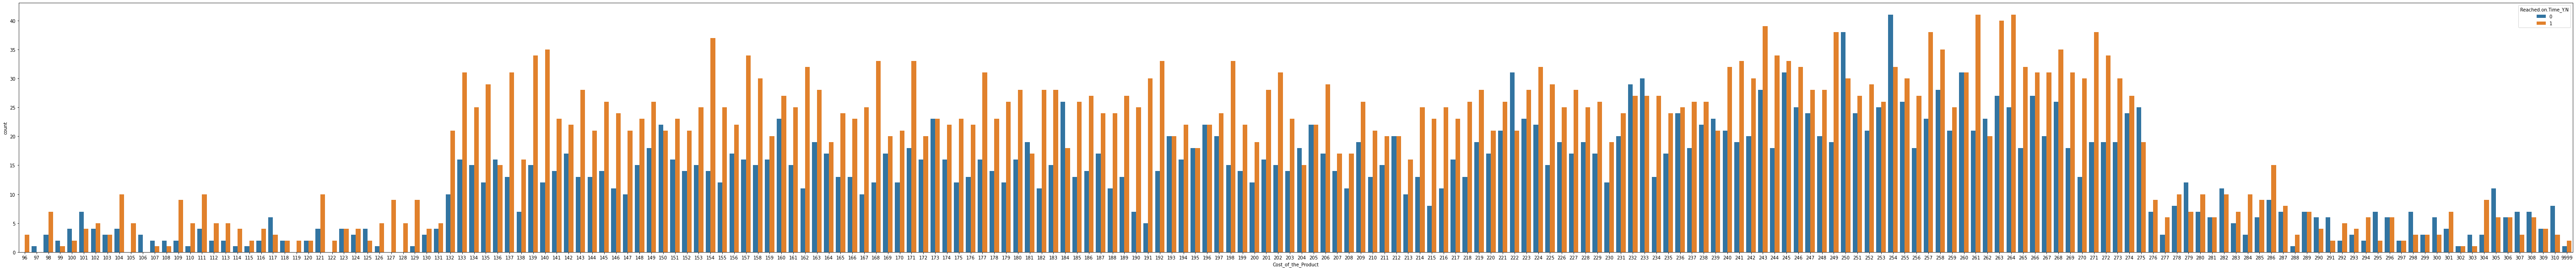

In [48]:
plt.figure(figsize = (100,10))
sns.countplot(data = train, 
             x = 'Cost_of_the_Product',
             hue = 'Reached.on.Time_Y.N')

### 4.1.3.2  Cost_of_the_Product 범주화

In [49]:
# Cost_of_the_Product 컬럼을 범주형으로 만들자
# 90초과부터 20단위로, 310~9999는 한개의 데이터
#카테고리 범위 앞의 수 초과 ~ 뒤의 수 이하
bins=[90, 110, 130, 150, 170, 190, 210, 230, 250, 270, 290, 310, 9999] #구간 설정, 같은 숫자는 중복으로 입력할 수 없다(오류 출력된다)
labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] #라벨의 수 = 구간의 수 - 1
train['Cost_of_the_Product']

#원하는 구간을 잘라내주는 cut() 함수 : 카테고리화 함수
train['Cost_of_the_Product'] = pd.cut(train['Cost_of_the_Product'], bins, labels=labels)
train['Cost_of_the_Product'].value_counts()

9     1108
8     1043
7      824
4      811
5      797
6      787
3      744
10     473
11     180
2      135
1       94
12       3
Name: Cost_of_the_Product, dtype: int64

In [50]:
test['Cost_of_the_Product'].value_counts()

257     48
245     46
260     44
255     42
238     42
        ..
112      1
101      1
103      1
305      1
9999     1
Name: Cost_of_the_Product, Length: 215, dtype: int64

In [51]:
# Cost_of_the_Product 컬럼을 범주형으로 만들자
# 90초과부터 20단위로, 310~9999는 한개의 데이터
#카테고리 범위 앞의 수 초과 ~ 뒤의 수 이하
bins=[90, 110, 130, 150, 170, 190, 210, 230, 250, 270, 290, 310, 9999] #구간 설정, 같은 숫자는 중복으로 입력할 수 없다(오류 출력된다)
labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] #라벨의 수 = 구간의 수 - 1
test['Cost_of_the_Product']

#원하는 구간을 잘라내주는 cut() 함수 : 카테고리화 함수
test['Cost_of_the_Product'] = pd.cut(test['Cost_of_the_Product'], bins, labels=labels)
test['Cost_of_the_Product'].value_counts()

9     650
8     589
4     492
7     480
5     456
6     437
3     410
10    262
11    102
2      76
1      45
12      1
Name: Cost_of_the_Product, dtype: int64

In [52]:
test['Cost_of_the_Product']

ID
7000     10
7001      3
7002      3
7003     11
7004      3
         ..
10995     6
10996     6
10997     6
10998     9
10999     9
Name: Cost_of_the_Product, Length: 4000, dtype: category
Categories (12, int64): [1 < 2 < 3 < 4 ... 9 < 10 < 11 < 12]

### 4.1.4 Gender

In [53]:
train['Gender'].value_counts()

1    3509
2    3490
Name: Gender, dtype: int64

### 4.1.5 Reached.on.Time_Y.N

In [54]:
train['Reached.on.Time_Y.N'].value_counts()

1    4162
0    2837
Name: Reached.on.Time_Y.N, dtype: int64

### 4.1.6 결측값 없는 컬럼 묶기
- Warehouse_block, Customer_rating, Cost_of_the_Product, Gender, Reached.on.Time_Y.N

In [55]:
pre_train = train[['Warehouse_block ', 'Customer_rating', 'Cost_of_the_Product', 'Gender', 'Reached.on.Time_Y.N']]

In [56]:
pre_train

,Warehouse_block,Customer_rating,Cost_of_the_Product,Gender,Reached.on.Time_Y.N
ID,,,,,
1,2,2,3,1,1
2,1,3,7,2,0
3,1,1,7,1,1
4,1,2,7,1,0
5,4,1,6,2,1
...,...,...,...,...,...
6995,4,2,8,2,0
6996,1,5,7,2,0
6997,4,1,11,2,0


## 4.2 결측치 채우기
- Mode_of_Shipment, Product_importance, Customer_care_calls, Prior_purchases, Discount_offered, Weight_in_gms

### 4.1.1 : Mode_of_shipment 컬럼의 결측치 채우기

In [57]:
ship = train[['Warehouse_block ', 'Customer_rating', 'Cost_of_the_Product', 'Gender', 'Reached.on.Time_Y.N', 'Mode_of_Shipment']]

In [58]:
ship

,Warehouse_block,Customer_rating,Cost_of_the_Product,Gender,Reached.on.Time_Y.N,Mode_of_Shipment
ID,,,,,,
1,2,2,3,1,1,1
2,1,3,7,2,0,3
3,1,1,7,1,1,1
4,1,2,7,1,0,1
5,4,1,6,2,1,3
...,...,...,...,...,...,...
6995,4,2,8,2,0,1
6996,1,5,7,2,0,1
6997,4,1,11,2,0,1


In [59]:
ship['Mode_of_Shipment'].value_counts()

1    4508
2    1075
3    1039
4     373
5       2
7       1
6       1
Name: Mode_of_Shipment, dtype: int64

In [60]:
ship_train = ship[ship['Mode_of_Shipment']!=4]

In [61]:
ship_test = ship[ship['Mode_of_Shipment']==4]

In [62]:
ship_train.keys()

Index(['Warehouse_block ', 'Customer_rating', 'Cost_of_the_Product', 'Gender',
       'Reached.on.Time_Y.N', 'Mode_of_Shipment'],
      dtype='object')

In [63]:
X_ship_train = ship_train.iloc[:, 0:5]

In [64]:
y_ship_train = ship_train.iloc[:, 5:6]

In [65]:
X_ship_test = ship_test.iloc[:, 0:5]

In [66]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()

In [67]:
forest.fit(X_ship_train, y_ship_train)

<ipython-input-67-f13825cd0054>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_ship_train, y_ship_train)


RandomForestClassifier()

In [68]:
y_ship_test = forest.predict(X_ship_test)

# 0618 - ing

In [69]:
unique, counts = np.unique(y_ship_test, return_counts=True)
dict(zip(unique, counts))

{1: 345, 2: 16, 3: 12}

In [70]:
len(train[train['Mode_of_Shipment']==4])

373

In [71]:
df_y_ship_test = pd.Series(y_ship_test)
pd.DataFrame(df_y_ship_test, columns=['Mode_of_Shipment'])

,Mode_of_Shipment
0,1
1,1
2,1
3,1
4,1
...,...
368,1
369,1
370,1
371,1


In [72]:
num = 0
for i in range(len(train['Mode_of_Shipment'])):
    if(train[['Mode_of_Shipment']]['Mode_of_Shipment'].iloc[i] == 4):
        train['Mode_of_Shipment'].iloc[i] = y_ship_test[num]
        num+=1

C:\Users\smhrd\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [73]:
len(train[train['Mode_of_Shipment']==4])

0

In [74]:
num

373

In [75]:
train['Mode_of_Shipment'].value_counts()

1    4853
2    1091
3    1051
5       2
7       1
6       1
Name: Mode_of_Shipment, dtype: int64

### 4.1.2 : Product_importance 컬럼의 결측치 채우기

In [76]:
ship = train[['Warehouse_block ', 'Customer_rating', 'Cost_of_the_Product', 'Gender', 'Reached.on.Time_Y.N', 'Product_importance']]

In [77]:
ship

,Warehouse_block,Customer_rating,Cost_of_the_Product,Gender,Reached.on.Time_Y.N,Product_importance
ID,,,,,,
1,2,2,3,1,1,1
2,1,3,7,2,0,1
3,1,1,7,1,1,1
4,1,2,7,1,0,2
5,4,1,6,2,1,3
...,...,...,...,...,...,...
6995,4,2,8,2,0,2
6996,1,5,7,2,0,2
6997,4,1,11,2,0,1


In [78]:
ship['Product_importance'].value_counts()

1    3345
2    2983
3     574
4      97
Name: Product_importance, dtype: int64

In [79]:
ship_train = ship[ship['Product_importance']!=4]

In [80]:
ship_test = ship[ship['Product_importance']==4]

In [81]:
X_ship_train = ship_train.iloc[:, 0:5]
y_ship_train = ship_train.iloc[:, 5:6]
X_ship_test = ship_test.iloc[:, 0:5]

In [82]:
forest = RandomForestClassifier()

In [83]:
forest.fit(X_ship_train, y_ship_train)

<ipython-input-83-f13825cd0054>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_ship_train, y_ship_train)


RandomForestClassifier()

In [84]:
y_ship_test = forest.predict(X_ship_test)

In [85]:
unique, counts = np.unique(y_ship_test, return_counts=True)
dict(zip(unique, counts))

{1: 49, 2: 48}

In [86]:
df_y_ship_test = pd.Series(y_ship_test)
pd.DataFrame(df_y_ship_test, columns=['Product_importance'])

,Product_importance
0,1
1,2
2,1
3,2
4,2
...,...
92,1
93,2
94,1
95,1


In [87]:
num = 0
for i in range(len(train['Product_importance'])):
    if(train[['Product_importance']]['Product_importance'].iloc[i] == 4):
        train['Product_importance'].iloc[i] = y_ship_test[num]
        num+=1

C:\Users\smhrd\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [88]:
len(train[train['Product_importance']==4])

0

In [89]:
train['Product_importance'].value_counts()

1    3394
2    3031
3     574
Name: Product_importance, dtype: int64

### 4.1.3 : Customer_care_calls 컬럼의 결측치 채우기

In [90]:
train['Customer_care_calls'].value_counts()

4.0    1756
3.0    1620
5.0    1147
6.0     496
2.0     287
7.0     117
Name: Customer_care_calls, dtype: int64

In [91]:
train['Customer_care_calls'] = train['Customer_care_calls'].fillna(8)

In [92]:
train['Customer_care_calls'].value_counts()

4.0    1756
3.0    1620
8.0    1576
5.0    1147
6.0     496
2.0     287
7.0     117
Name: Customer_care_calls, dtype: int64

In [93]:
ship = train[['Warehouse_block ', 'Customer_rating', 'Cost_of_the_Product', 'Gender', 'Reached.on.Time_Y.N', 'Customer_care_calls']]

In [94]:
ship_train = ship[ship['Customer_care_calls']!=8]

In [95]:
ship_test = ship[ship['Customer_care_calls']==8]

In [96]:
X_ship_train = ship_train.iloc[:, 0:5]
y_ship_train = ship_train.iloc[:, 5:6]
X_ship_test = ship_test.iloc[:, 0:5]

In [97]:
forest = RandomForestClassifier()

In [98]:
forest.fit(X_ship_train, y_ship_train)

<ipython-input-98-f13825cd0054>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_ship_train, y_ship_train)


RandomForestClassifier()

In [99]:
y_ship_test = forest.predict(X_ship_test)

In [100]:
unique, counts = np.unique(y_ship_test, return_counts=True)
dict(zip(unique, counts))

{2.0: 28, 3.0: 560, 4.0: 577, 5.0: 302, 6.0: 96, 7.0: 13}

In [101]:
df_y_ship_test = pd.Series(y_ship_test)
pd.DataFrame(df_y_ship_test, columns=['Customer_care_calls'])

,Customer_care_calls
0,4.0
1,4.0
2,5.0
3,5.0
4,3.0
...,...
1571,4.0
1572,4.0
1573,4.0
1574,5.0


In [102]:
num = 0
for i in range(len(train['Customer_care_calls'])):
    if(train[['Customer_care_calls']]['Customer_care_calls'].iloc[i] == 8):
        train['Customer_care_calls'].iloc[i] = y_ship_test[num]
        num+=1

C:\Users\smhrd\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [103]:
len(train[train['Customer_care_calls']==8])

0

### test 'Customer_care_calls'

In [104]:
test['Customer_care_calls'].value_counts()

4.0    990
3.0    901
5.0    667
6.0    311
2.0    208
7.0     67
Name: Customer_care_calls, dtype: int64

In [105]:
test['Customer_care_calls'] = test['Customer_care_calls'].fillna(8)

In [106]:
test['Customer_care_calls'].value_counts()

4.0    990
3.0    901
8.0    856
5.0    667
6.0    311
2.0    208
7.0     67
Name: Customer_care_calls, dtype: int64

In [107]:
ship = test[['Warehouse_block ', 'Customer_rating', 'Cost_of_the_Product', 'Gender', 'Customer_care_calls']]

In [108]:
ship_train = ship[ship['Customer_care_calls']!=8]

In [109]:
ship_test = ship[ship['Customer_care_calls']==8]

In [110]:
X_ship_train = ship_train.iloc[:, 0:4]
y_ship_train = ship_train.iloc[:, 4:5]
X_ship_test = ship_test.iloc[:, 0:4]

In [111]:
forest = RandomForestClassifier()

In [112]:
forest.fit(X_ship_train, y_ship_train)

<ipython-input-112-f13825cd0054>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_ship_train, y_ship_train)


RandomForestClassifier()

In [113]:
y_ship_test = forest.predict(X_ship_test)

In [114]:
unique, counts = np.unique(y_ship_test, return_counts=True)
dict(zip(unique, counts))

{2.0: 19, 3.0: 261, 4.0: 331, 5.0: 162, 6.0: 69, 7.0: 14}

In [115]:
df_y_ship_test = pd.Series(y_ship_test)
pd.DataFrame(df_y_ship_test, columns=['Customer_care_calls'])

,Customer_care_calls
0,4.0
1,3.0
2,4.0
3,4.0
4,4.0
...,...
851,4.0
852,3.0
853,5.0
854,3.0


In [116]:
num = 0
for i in range(len(test['Customer_care_calls'])):
    if(test[['Customer_care_calls']]['Customer_care_calls'].iloc[i] == 8):
        test['Customer_care_calls'].iloc[i] = y_ship_test[num]
        num+=1

C:\Users\smhrd\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [117]:
len(test[test['Customer_care_calls']==8])

0

In [118]:
test['Customer_care_calls'].value_counts()

4.0    1321
3.0    1162
5.0     829
6.0     380
2.0     227
7.0      81
Name: Customer_care_calls, dtype: int64

### 4.1.4 : Prior_purchases 컬럼의 결측치 채우기

In [119]:
train['Prior_purchases'].value_counts()

3.0     2176
2.0     1423
4.0     1162
5.0      735
6.0      310
10.0     101
8.0       72
7.0       70
Name: Prior_purchases, dtype: int64

In [120]:
train['Prior_purchases'] = train['Prior_purchases'].fillna(1)

In [121]:
train['Prior_purchases'].value_counts()

3.0     2176
2.0     1423
4.0     1162
1.0      950
5.0      735
6.0      310
10.0     101
8.0       72
7.0       70
Name: Prior_purchases, dtype: int64

In [122]:
ship = train[['Warehouse_block ', 'Customer_rating', 'Cost_of_the_Product', 'Gender', 'Reached.on.Time_Y.N', 'Prior_purchases']]

In [123]:
ship_train = ship[ship['Prior_purchases']!=1]

In [124]:
ship_test = ship[ship['Prior_purchases']==1]

In [125]:
X_ship_train = ship_train.iloc[:, 0:5]
y_ship_train = ship_train.iloc[:, 5:6]
X_ship_test = ship_test.iloc[:, 0:5]

In [126]:
forest = RandomForestClassifier()

In [127]:
forest.fit(X_ship_train, y_ship_train)

<ipython-input-127-f13825cd0054>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_ship_train, y_ship_train)


RandomForestClassifier()

In [128]:
y_ship_test = forest.predict(X_ship_test)

In [129]:
unique, counts = np.unique(y_ship_test, return_counts=True)
dict(zip(unique, counts))

{2.0: 220, 3.0: 474, 4.0: 154, 5.0: 76, 6.0: 11, 7.0: 3, 8.0: 6, 10.0: 6}

In [130]:
df_y_ship_test = pd.Series(y_ship_test)
pd.DataFrame(df_y_ship_test, columns=['Prior_purchases'])

,Prior_purchases
0,2.0
1,4.0
2,3.0
3,2.0
4,2.0
...,...
945,3.0
946,3.0
947,3.0
948,5.0


In [131]:
num = 0
for i in range(len(train['Prior_purchases'])):
    if(train[['Prior_purchases']]['Prior_purchases'].iloc[i] == 1):
        train['Prior_purchases'].iloc[i] = y_ship_test[num]
        num+=1

C:\Users\smhrd\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [132]:
len(train[train['Prior_purchases']==1])

0

In [133]:
train['Prior_purchases'].value_counts()

3.0     2650
2.0     1643
4.0     1316
5.0      811
6.0      321
10.0     107
8.0       78
7.0       73
Name: Prior_purchases, dtype: int64

### test - prior_purchases

In [134]:
test['Prior_purchases'].value_counts()

3.0     1293
2.0      866
4.0      723
5.0      414
6.0      184
10.0      56
7.0       53
8.0       44
Name: Prior_purchases, dtype: int64

In [135]:
test['Prior_purchases'] = test['Prior_purchases'].fillna(1)

In [136]:
test['Prior_purchases'].value_counts()

3.0     1293
2.0      866
4.0      723
5.0      414
1.0      367
6.0      184
10.0      56
7.0       53
8.0       44
Name: Prior_purchases, dtype: int64

In [137]:
ship = test[['Warehouse_block ', 'Customer_rating', 'Cost_of_the_Product', 'Gender', 'Prior_purchases']]

In [138]:
ship_train = ship[ship['Prior_purchases']!=1]

In [139]:
ship_test = ship[ship['Prior_purchases']==1]

In [140]:
X_ship_train = ship_train.iloc[:, 0:4]
y_ship_train = ship_train.iloc[:, 4:5]
X_ship_test = ship_test.iloc[:, 0:4]

In [141]:
forest = RandomForestClassifier()

In [142]:
forest.fit(X_ship_train, y_ship_train)

<ipython-input-142-f13825cd0054>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_ship_train, y_ship_train)


RandomForestClassifier()

In [143]:
y_ship_test = forest.predict(X_ship_test)

In [144]:
unique, counts = np.unique(y_ship_test, return_counts=True)
dict(zip(unique, counts))

{2.0: 64, 3.0: 203, 4.0: 70, 5.0: 26, 6.0: 3, 10.0: 1}

In [145]:
df_y_ship_test = pd.Series(y_ship_test)
pd.DataFrame(df_y_ship_test, columns=['Prior_purchases'])

,Prior_purchases
0,4.0
1,3.0
2,4.0
3,4.0
4,3.0
...,...
362,3.0
363,2.0
364,3.0
365,3.0


In [146]:
num = 0
for i in range(len(test['Prior_purchases'])):
    if(test[['Prior_purchases']]['Prior_purchases'].iloc[i] == 1):
        test['Prior_purchases'].iloc[i] = y_ship_test[num]
        num+=1

C:\Users\smhrd\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [147]:
len(test[test['Prior_purchases']==1])

0

In [148]:
test['Prior_purchases'].value_counts()

3.0     1496
2.0      930
4.0      793
5.0      440
6.0      187
10.0      57
7.0       53
8.0       44
Name: Prior_purchases, dtype: int64

### 4.1.5 : Discount_offered 컬럼의 결측치 채우기

In [149]:
train['Discount_offered'].unique()

array([nan,  6.,  2.,  9.,  3., 34.,  7.,  1., 53.,  8., 63.,  4., 43.,
       60., 51.,  5., 10., 55., 17., 62., 15., 23., 38., 32., 39., 29.,
       45., 14., 52., 41., 58., 11., 50., 35., 28., 31., 24., 64., 61.,
       48., 65., 40., 18., 22., 56., 49., 21., 27., 20., 13., 30., 26.,
       54., 16., 57., 47., 42., 36., 37., 46., 19., 12., 25., 44., 33.,
       59.])

In [150]:
train['Discount_offered'] = train['Discount_offered'].fillna(0)

In [151]:
test['Discount_offered'].unique()

array([nan,  7.,  5., 64.,  4., 29., 10.,  8., 31., 53.,  1., 22., 49.,
        3., 52.,  6.,  9., 20., 61.,  2., 39., 43., 48., 54., 26., 42.,
       46., 41., 16., 13., 15., 35., 28., 34., 33., 37., 27., 36., 63.,
       40., 62., 38., 25., 51., 45., 32., 50., 21., 58., 65., 57., 17.,
       24., 12., 47., 56., 60., 59., 30., 18., 55., 19., 11., 23., 44.,
       14.])

In [152]:
test['Discount_offered'] = test['Discount_offered'].fillna(0)

### 4.1.6 : Weight_in_gms 컬럼의 결측치 채우기

### 4.1.6.1 :  Weight_in_gms 컬럼 범주화

In [153]:
train['Weight_in_gms'] = train['Weight_in_gms'].replace('?',0)

In [154]:
train['Weight_in_gms'] = pd.to_numeric(train['Weight_in_gms'], downcast='integer')

In [155]:
# Weight_in_gms 컬럼을 범주형으로 만들자
# 90초과부터 20단위로, 310~9999는 한개의 데이터
#카테고리 범위 앞의 수 초과 ~ 뒤의 수 이하
bins=[-1, 0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500] #구간 설정, 같은 숫자는 중복으로 입력할 수 없다(오류 출력된다)
labels=[1, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500] #라벨의 수 = 구간의 수 - 1
train['Weight_in_gms']

#원하는 구간을 잘라내주는 cut() 함수 : 카테고리화 함수
train['Weight_in_gms'] = pd.cut(train['Weight_in_gms'], bins, labels=labels)
train['Weight_in_gms'].value_counts()

1500    971
2000    948
5000    939
4500    918
6000    890
5500    863
1       446
4000    268
2500    259
3000    247
3500    246
6500      1
1000      0
500       0
Name: Weight_in_gms, dtype: int64

In [156]:
test['Weight_in_gms'] = test['Weight_in_gms'].replace('?',0)

In [157]:
test['Weight_in_gms'] = pd.to_numeric(test['Weight_in_gms'], downcast='integer')

In [158]:
# Weight_in_gms 컬럼을 범주형으로 만들자
# 90초과부터 20단위로, 310~9999는 한개의 데이터
#카테고리 범위 앞의 수 초과 ~ 뒤의 수 이하
bins=[-1, 0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500] #구간 설정, 같은 숫자는 중복으로 입력할 수 없다(오류 출력된다)
labels=[1, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500] #라벨의 수 = 구간의 수 - 1
test['Weight_in_gms']

#원하는 구간을 잘라내주는 cut() 함수 : 카테고리화 함수
test['Weight_in_gms'] = pd.cut(test['Weight_in_gms'], bins, labels=labels)
test['Weight_in_gms'].value_counts()

2000    561
1500    553
4500    541
5000    517
5500    496
6000    490
1       252
2500    150
4000    148
3000    146
3500    143
6500      0
1000      0
500       0
Name: Weight_in_gms, dtype: int64

### 4.1.6.2 Weight_in_gms 컬럼의 결측치 채우기

In [159]:
ship = train[['Warehouse_block ', 'Customer_rating', 'Cost_of_the_Product', 'Gender', 'Reached.on.Time_Y.N', 'Weight_in_gms']]

In [160]:
ship_train = ship[ship['Weight_in_gms']!=1]

In [161]:
ship_test = ship[ship['Weight_in_gms']==1]

In [162]:
X_ship_train = ship_train.iloc[:, 0:5]
y_ship_train = ship_train.iloc[:, 5:6]
X_ship_test = ship_test.iloc[:, 0:5]

In [163]:
forest = RandomForestClassifier()

In [164]:
forest.fit(X_ship_train, y_ship_train)

<ipython-input-164-f13825cd0054>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_ship_train, y_ship_train)


RandomForestClassifier()

In [165]:
y_ship_test = forest.predict(X_ship_test)

In [166]:
unique, counts = np.unique(y_ship_test, return_counts=True)
dict(zip(unique, counts))

{1500: 89,
 2000: 75,
 2500: 17,
 3000: 13,
 3500: 14,
 4000: 20,
 4500: 55,
 5000: 56,
 5500: 57,
 6000: 50}

In [167]:
df_y_ship_test = pd.Series(y_ship_test)
pd.DataFrame(df_y_ship_test, columns=['Weight_in_gms'])

,Weight_in_gms
0,4500
1,1500
2,4500
3,2000
4,4500
...,...
441,1500
442,5500
443,2500
444,3000


In [168]:
num = 0
for i in range(len(train['Weight_in_gms'])):
    if(train[['Weight_in_gms']]['Weight_in_gms'].iloc[i] == 1):
        train['Weight_in_gms'].iloc[i] = y_ship_test[num]
        num+=1

In [169]:
len(train[train['Weight_in_gms']==1])

0

In [170]:
train['Weight_in_gms'].value_counts()

1500    1060
2000    1023
5000     995
4500     973
6000     940
5500     920
4000     288
2500     276
3500     260
3000     260
6500       1
1000       0
500        0
1          0
Name: Weight_in_gms, dtype: int64

In [171]:
train['Weight_in_gms']

ID
1       1500
2       1500
3       5000
4       6000
5       5000
        ... 
6995    2000
6996    5500
6997    2000
6998    5000
6999    5500
Name: Weight_in_gms, Length: 6999, dtype: category
Categories (14, int64): [1 < 500 < 1000 < 1500 ... 5000 < 5500 < 6000 < 6500]

### test - weight_in_gms

In [172]:
ship = test[['Warehouse_block ', 'Customer_rating', 'Cost_of_the_Product', 'Gender', 'Weight_in_gms']]

In [173]:
ship_train = ship[ship['Weight_in_gms']!=1]

In [174]:
ship_test = ship[ship['Weight_in_gms']==1]

In [175]:
X_ship_train = ship_train.iloc[:, 0:4]
y_ship_train = ship_train.iloc[:, 4:5]
X_ship_test = ship_test.iloc[:, 0:4]

In [176]:
forest = RandomForestClassifier()

In [177]:
forest.fit(X_ship_train, y_ship_train)

<ipython-input-177-f13825cd0054>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_ship_train, y_ship_train)


RandomForestClassifier()

In [178]:
y_ship_test = forest.predict(X_ship_test)

In [179]:
unique, counts = np.unique(y_ship_test, return_counts=True)
dict(zip(unique, counts))

{1500: 46,
 2000: 39,
 2500: 6,
 3000: 10,
 3500: 2,
 4000: 7,
 4500: 37,
 5000: 41,
 5500: 20,
 6000: 44}

In [180]:
df_y_ship_test = pd.Series(y_ship_test)
pd.DataFrame(df_y_ship_test, columns=['Weight_in_gms'])

,Weight_in_gms
0,6000
1,5500
2,3000
3,6000
4,1500
...,...
247,3000
248,5000
249,5000
250,1500


In [181]:
num = 0
for i in range(len(test['Weight_in_gms'])):
    if(test[['Weight_in_gms']]['Weight_in_gms'].iloc[i] == 1):
        test['Weight_in_gms'].iloc[i] = y_ship_test[num]
        num+=1

In [182]:
len(test[test['Weight_in_gms']==1])

0

In [183]:
test['Weight_in_gms'].value_counts()

2000    600
1500    599
4500    578
5000    558
6000    534
5500    516
3000    156
2500    156
4000    155
3500    145
6500      0
1000      0
500       0
1         0
Name: Weight_in_gms, dtype: int64

In [184]:
test['Weight_in_gms']

ID
7000     4500
7001     1500
7002     5500
7003     2000
7004     5500
         ... 
10995    2000
10996    4000
10997    5000
10998    2000
10999    1500
Name: Weight_in_gms, Length: 4000, dtype: category
Categories (14, int64): [1 < 500 < 1000 < 1500 ... 5000 < 5500 < 6000 < 6500]

# 4.3 원핫인코딩

In [185]:
X_train = train.iloc[:, 0:10]

In [186]:
y_train = train.iloc[:, 10:11]

In [187]:
X_onehot_train = pd.get_dummies(X_train)

In [188]:
X_onehot_train

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Prior_purchases,Product_importance,Gender,Discount_offered,Cost_of_the_Product_1,Cost_of_the_Product_2,...,Weight_in_gms_2000,Weight_in_gms_2500,Weight_in_gms_3000,Weight_in_gms_3500,Weight_in_gms_4000,Weight_in_gms_4500,Weight_in_gms_5000,Weight_in_gms_5500,Weight_in_gms_6000,Weight_in_gms_6500
ID,,,,,,,,,,,,,,,,,,,,,
1,2,1,2.0,2,3.0,1,1,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,5.0,3,5.0,1,2,6.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,3.0,1,3.0,1,1,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,1,3.0,2,2.0,2,1,2.0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,4,3,4.0,1,6.0,3,2,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,4,1,4.0,2,5.0,2,2,4.0,0,0,...,1,0,0,0,0,0,0,0,0,0
6996,1,1,3.0,5,2.0,2,2,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
6997,4,1,6.0,1,5.0,1,2,10.0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [189]:
X_onehot_test = pd.get_dummies(test)

In [190]:
X_onehot_test

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Prior_purchases,Product_importance,Gender,Discount_offered,Cost_of_the_Product_1,Cost_of_the_Product_2,...,Weight_in_gms_2000,Weight_in_gms_2500,Weight_in_gms_3000,Weight_in_gms_3500,Weight_in_gms_4000,Weight_in_gms_4500,Weight_in_gms_5000,Weight_in_gms_5500,Weight_in_gms_6000,Weight_in_gms_6500
ID,,,,,,,,,,,,,,,,,,,,,
7000,1,1,3.0,1,4.0,3,1,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
7001,1,1,3.0,4,2.0,2,2,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
7002,3,3,4.0,5,3.0,1,2,7.0,0,0,...,0,0,0,0,0,0,0,1,0,0
7003,2,1,3.0,1,4.0,1,2,0.0,0,0,...,1,0,0,0,0,0,0,0,0,0
7004,1,4,4.0,2,3.0,1,2,5.0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,3,4,4.0,1,4.0,4,2,0.0,0,0,...,1,0,0,0,0,0,0,0,0,0
10996,2,1,3.0,3,2.0,2,1,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
10997,5,3,3.0,3,2.0,2,1,7.0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Gender 드랍

In [191]:
X_onehot_train = X_onehot_train.drop(['Gender'], axis = 1)

In [192]:
X_onehot_test = X_onehot_test.drop(['Gender'], axis = 1)

In [193]:
X_onehot_train

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Prior_purchases,Product_importance,Discount_offered,Cost_of_the_Product_1,Cost_of_the_Product_2,Cost_of_the_Product_3,...,Weight_in_gms_2000,Weight_in_gms_2500,Weight_in_gms_3000,Weight_in_gms_3500,Weight_in_gms_4000,Weight_in_gms_4500,Weight_in_gms_5000,Weight_in_gms_5500,Weight_in_gms_6000,Weight_in_gms_6500
ID,,,,,,,,,,,,,,,,,,,,,
1,2,1,2.0,2,3.0,1,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,3,5.0,3,5.0,1,6.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,3.0,1,3.0,1,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,1,3.0,2,2.0,2,2.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,4,3,4.0,1,6.0,3,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,4,1,4.0,2,5.0,2,4.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6996,1,1,3.0,5,2.0,2,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6997,4,1,6.0,1,5.0,1,10.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [194]:
X_onehot_test

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Prior_purchases,Product_importance,Discount_offered,Cost_of_the_Product_1,Cost_of_the_Product_2,Cost_of_the_Product_3,...,Weight_in_gms_2000,Weight_in_gms_2500,Weight_in_gms_3000,Weight_in_gms_3500,Weight_in_gms_4000,Weight_in_gms_4500,Weight_in_gms_5000,Weight_in_gms_5500,Weight_in_gms_6000,Weight_in_gms_6500
ID,,,,,,,,,,,,,,,,,,,,,
7000,1,1,3.0,1,4.0,3,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7001,1,1,3.0,4,2.0,2,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7002,3,3,4.0,5,3.0,1,7.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7003,2,1,3.0,1,4.0,1,0.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7004,1,4,4.0,2,3.0,1,5.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,3,4,4.0,1,4.0,4,0.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
10996,2,1,3.0,3,2.0,2,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10997,5,3,3.0,3,2.0,2,7.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# 5. 모델 선택 및 하이퍼파라미터 튜닝
# 6. 학습
# 7. 평가

## Grid Search & Random Forest

In [195]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [196]:
forest = RandomForestClassifier()

In [197]:
forest = RandomForestClassifier(max_depth = 14
                                , max_features = 0.8
                                , max_leaf_nodes = 22
                                , min_samples_leaf = 12
                                , n_estimators = 1500)

In [198]:
forest.fit(X_onehot_train, y_train)

<ipython-input-198-6848613af8ce>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_onehot_train, y_train)


RandomForestClassifier(max_depth=14, max_features=0.8, max_leaf_nodes=22,
                       min_samples_leaf=12, n_estimators=1500)

In [199]:
forest.score(X_onehot_train, y_train)

0.6918131161594514

In [200]:
pre = forest.predict(X_onehot_test)

In [202]:
result = pd.read_csv('sampleSubmission.csv')
result['Reached.on.Time_Y.N'] = pre
result.to_csv('RandomForest_smhrd_04.csv', index = False)

In [203]:
result['Reached.on.Time_Y.N'].value_counts()

0    2585
1    1415
Name: Reached.on.Time_Y.N, dtype: int64